# Introduction to Correlation and Colocalisation with Python.

## Reading images

Exercise: See the similarities between the dot-product and correlation. Apply correlation to images to obtain a metric of colocalisation/similarity. Use colocalisation to assess the quality of registration.

We start with two lists of numbers (or two vectors or arrays as they are known). Please find the dot product of the two vectors. The dot product formula is a follows:<img src="dotProduct.png">
In python there is more than one way to find the dot product of two vectors. It can be performed using 'for loops' or through vectorised notation

In [2]:
#This line is very important: (It turns on the inline visuals!)
%pylab inline
a = [2,9,32,12,14,6,9,23,4,5,13,6,7,92,21,45];
b = [7,21,4,2,92,9,9,6,13,12,45,5,6,23,14,32];

#Please calculate the dot product of the vectors 'a' and 'b'.
#You may use any method you like. If get stuck. Check:
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
#If you rearrange the numbers in 'b', what sequence will give
#the highest dot-product magnitude?


Populating the interactive namespace from numpy and matplotlib


The above example shows you how two number sequences can be compared with nothing more complicated than by using the dot product. The cavaet is that we cannot compare different sequences with the original unless we normalise them to make the sum of the sequences the same. To include this step.

In [3]:


CC = np.average((a-np.average(a))*(b-np.average(b)))/(np.std(a)*np.std(b))


In [1]:
from tifffile import imread as imreadtiff
im = imreadtiff('neuron.tif')
subplot(2,2,1)
imshow(im[0,:,:],cmap='Blues_r')
subplot(2,2,2)
imshow(im[1,:,:],cmap='Greens_r')
subplot(2,2,3)
imshow(im[2,:,:],cmap='Greys_r')
subplot(2,2,4)
imshow(im[3,:,:],cmap='Reds_r')

NameError: name 'subplot' is not defined

dtype('uint16')

In [58]:
a = im[0,:,:].reshape(-1)
b = im[3,:,:].reshape(-1)
CC = np.average((a-np.average(a))*(b-np.average(b)))/(np.std(a)*np.std(b))
print CC

0.829104646365


('shape of im: ', (2, 3, 167, 261), 'bit-depth: ', dtype('uint16'))


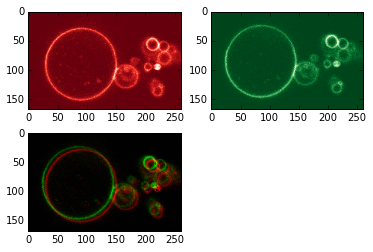

In [156]:
#from tifffile import imread as imreadtiff
im = imreadtiff('composite.tif')

#The organisation of this file is not simple. It is also a 16-bit image.
print("shape of im: ",im.shape,"bit-depth: ",im.dtype)

#We can assess the image data like so.
CH0 = im[0,0,:,:]
CH1 = im[1,0,:,:]

#We can visualise single channels of any bit-depth by visualising as normal.
subplot(2,2,1)
imshow(CH0,cmap='Reds_r')
subplot(2,2,2)
imshow(CH1,cmap='Greens_r')
subplot(2,2,3)

#RGB data have to range between 0 and 255 in each channel and be 8-bit.
imRGB = np.zeros((CH0.shape[0],CH0.shape[1],3))
imRGB[:,:,0] = CH0/255.0
imRGB[:,:,1] = CH1/255.0
imshow(255-imRGB.astype(int8))
